# Happy House Dataset

## We will be using the Happy House dataset for this exercise, which contains images of peoples' faces. Your task will be to build a ConvNet that determines whether the people in the images are smiling or not -- because they only get to enter the house if they're smiling!

In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib.pyplot as imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from cnn_utils import *
from test_utils import summary, comparator


%matplotlib inline
np.random.seed(1)

In [2]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


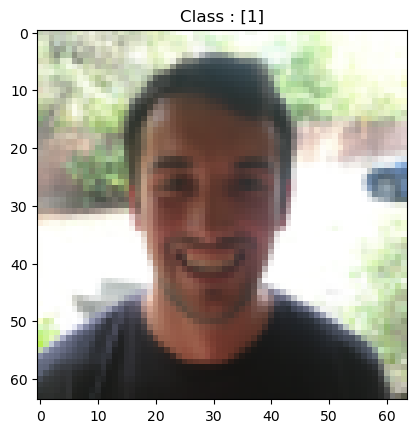

In [78]:
index =60
plt.imshow(X_train_orig[index])
plt.title('Class : {}'.format(Y_train[index]))
plt.show()

In [44]:
# GRADED FUNCTION: happyModel

def happyModel():
    """
    Implements the forward propagation for the binary classification model:
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code all the values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    None

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """
    model = tf.keras.Sequential([
            ## ZeroPadding2D with padding 3, input shape of 64 x 64 x 3
        tf.keras.layers.ZeroPadding2D((3,3),input_shape = (64, 64, 3)),
            ## Conv2D with 32 7x7 filters and stride of 1
        tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, strides = 1,),
            ## BatchNormalization for axis 3
        tf.keras.layers.BatchNormalization(axis = -1),
            ## ReLU
        tf.keras.layers.ReLU(),
            ## Max Pooling 2D with default parameters
        tf.keras.layers.MaxPooling2D(),
            ## Conv2D with 32 7x7 filters and stride of 1
        tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, strides = 1,),
            ## ReLU
        tf.keras.layers.ReLU(),
            ## Max Pooling 2D with default parameters
        tf.keras.layers.MaxPooling2D(),          
            ## Flatten layer
        tf.keras.layers.Flatten(),    
            ## Dense layer with 1 unit for output & 'sigmoid' activation
        tf.keras.layers.Dense(50,activation = 'ReLU',),
        tf.keras.layers.Dense(40,activation = 'ReLU',) ,
        tf.keras.layers.Dense(30,activation = 'ReLU',) ,
        tf.keras.layers.Dense(20,activation = 'ReLU',) ,
        tf.keras.layers.Dense(1,activation = 'sigmoid',)         
        ])
    
    return model

In [45]:
happy_model = happyModel()
happy_model.compile(optimizer = 'adam',
                   loss = 'binary_crossentropy',
                   metrics = ['accuracy'])

In [46]:
happy_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_4 (ZeroPadd  (None, 70, 70, 3)         0         
 ing2D)                                                          
                                                                 
 conv2d_5 (Conv2D)           (None, 68, 68, 32)        896       
                                                                 
 batch_normalization_4 (Bat  (None, 68, 68, 32)        128       
 chNormalization)                                                
                                                                 
 re_lu_13 (ReLU)             (None, 68, 68, 32)        0         
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 34, 34, 32)        0         
 g2D)                                                            
                                                      

In [47]:
happy_model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 [==============================] - 2s 13ms/step - loss: 0.4862 - accuracy: 0.7483
Epoch 2/10
38/38 [==============================] - 0s 13ms/step - loss: 0.2328 - accuracy: 0.9167
Epoch 3/10
38/38 [==============================] - 0s 13ms/step - loss: 0.2157 - accuracy: 0.9200
Epoch 4/10
38/38 [==============================] - 1s 13ms/step - loss: 0.1237 - accuracy: 0.9567
Epoch 5/10
38/38 [==============================] - 0s 13ms/step - loss: 0.0799 - accuracy: 0.9717
Epoch 6/10
38/38 [==============================] - 1s 13ms/step - loss: 0.0588 - accuracy: 0.9817
Epoch 7/10
38/38 [==============================] - 0s 13ms/step - loss: 0.0648 - accuracy: 0.9817
Epoch 8/10
38/38 [==============================] - 0s 13ms/step - loss: 0.0704 - accuracy: 0.9717
Epoch 9/10
38/38 [==============================] - 0s 13ms/step - loss: 0.0590 - accuracy: 0.9817
Epoch 10/10
38/38 [==============================] - 1s 13ms/step - loss: 0.0277 - accuracy: 0.9917


In [48]:
happy_model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 12ms/step - loss: 0.1033 - accuracy: 0.9667


[0.10329695791006088, 0.9666666388511658]

5/5 [==============================] - 0s 15ms/step


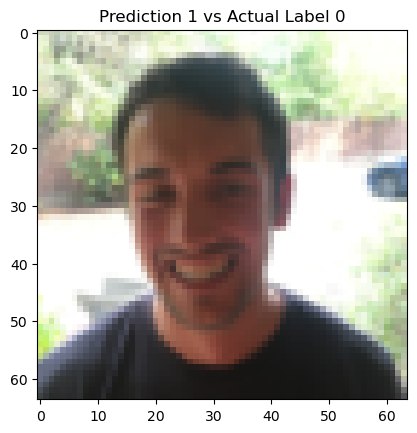

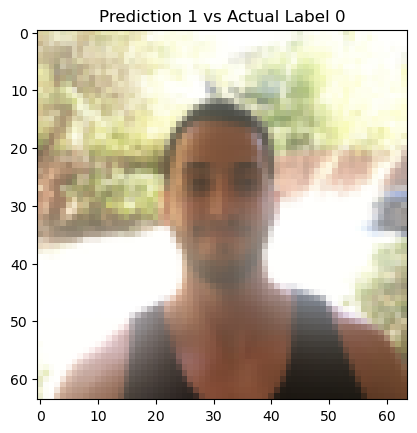

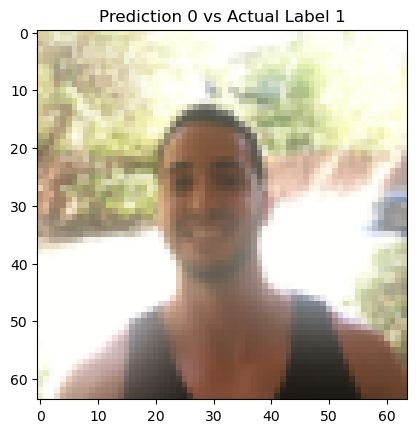

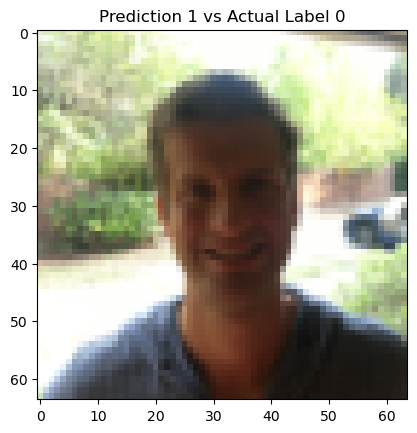

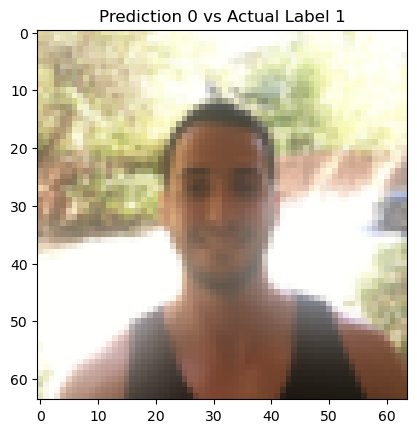

In [79]:
y_hat = happy_model.predict(X_test)
count = 0
for i, pred in enumerate(y_hat):
    if np.round(pred[0]) != Y_test[i][0]:
        plt.imshow(X_train_orig[i])
        plt.title("Prediction {a} vs Actual Label {b}".format(a=round(pred[0]), b=Y_test[i][0]))
        plt.show()
        count +=1

        
        

    